In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_data = pd.read_csv("data.csv",header = None)

In [2]:
nodes = set(list(df_data[0]) + list(df_data[1]))
N = len(nodes)
k_out = df_data[0].value_counts()
k_in = df_data[1].value_counts()

In [3]:
df_T = df_data.copy()
df_T = df_T.merge(k_out,left_on = 0,right_on = 0)
df_T["Probability"] = 1 / df_T["count"]

In [24]:
import scipy.sparse as sp
row = df_T[0]
col = df_T[1]
data = df_T["Probability"]
T = sp.coo_matrix((data, (row, col)), shape=(N, N)).tocsr()
v_u = np.ones(N) / N #一様分布

In [29]:
dangling_nodes=nodes-set(list(df_data[0]))
dangling_vec=[1 if i in dangling_nodes else 0 for i in range(0,N)]
d=dangling_vec

In [30]:
def f(p):
    prob=p*d
    return p@T + prob.sum() *v_u
p = np.ones(N)/N
converged=False
for _ in range(0,1000):
    p_prev=p.copy()
    p=f(p)
    err=np.abs(p-p_prev).max()
    if err<1e-10:
        converged=True
        PageRank=pd.Series(p)
        break

print("Converged." if converged else "")

Converged.


In [31]:
PageRank.sum()

1.0000000000000002

In [32]:
v_0 = np.zeros(N)
v_0[0] = 1 #i=0 のみ 1
v_24 = np.zeros(N)
v_24[24] = 1 #i=24 のみ 1

print(f(v_0).sum())
print(f(v_24).sum())
print(f(v_u).sum())

1.0
0.9999999999999989
1.0000000000000002


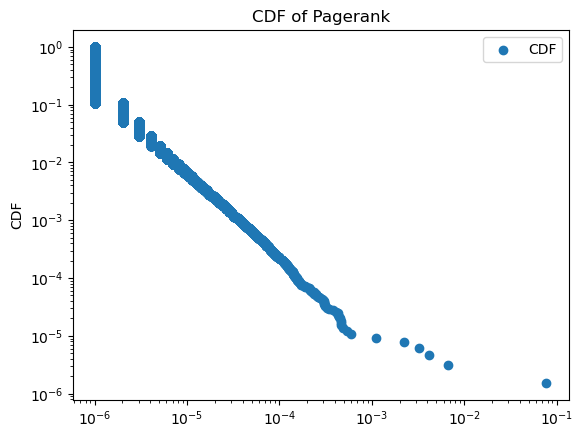

In [34]:
pagerank=pd.Series(p).value_counts(normalize=True)
pagerank.head()

x=np.sort(pagerank)
y = np.arange(len(x), 0, -1) / len(x)

plt.title("CDF of Pagerank")
plt.ylabel("CDF")
plt.xscale("log")
plt.yscale("log")
plt.scatter(x, y, label='CDF')
plt.legend()
plt.savefig("PDA_230868_14_2.png")
plt.show()